# EDA

In [2]:
import ggplot

from ggplot import *

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
import pandas as pd

In [4]:
book_df = pd.read_csv('books.csv')
ratings_df = pd.read_csv('ratings.csv')
booktags_df = pd.read_csv('booktags.csv')
tags_df = pd.read_csv('tags.csv')

In [5]:
ratings_df.shape

(5976479, 3)

In [6]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
ratings_per_user = ratings_df.groupby(by = 'user_id', as_index = False)[['rating']].count()

In [8]:
ratings_per_user.head()

,user_id,rating
0,1,117
1,2,65
2,3,91
3,4,134
4,5,100


In [14]:
ratings_per_user.rename(columns = {"rating": "Number of Ratings"}, inplace = True)

In [15]:
ratings_per_user.head()

,user_id,Number of Ratings
0,1,117
1,2,65
2,3,91
3,4,134
4,5,100


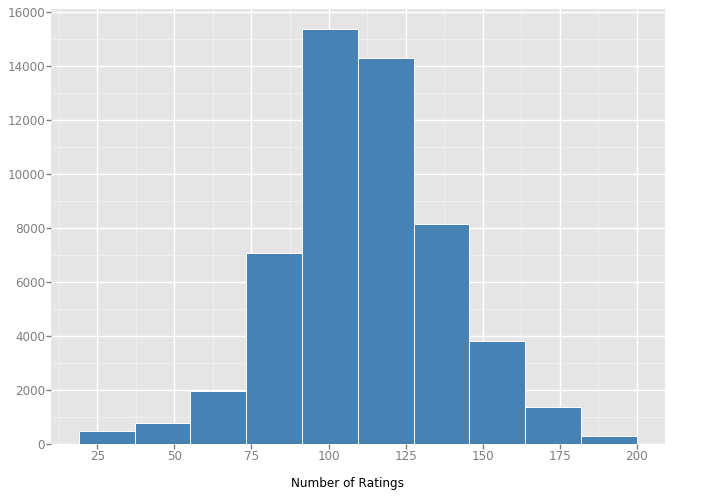

In [16]:
#Ratings per User

ratings_hist = ggplot(aes(x='Number of Ratings'), data=ratings_per_user) + \
    geom_histogram(fill = 'steelblue', color = 'snow')   
ggplot.save(ratings_hist,'num_ratings_hist')

In [18]:
ratings_df.rename(columns={'rating':"Rating"}, inplace = True)

In [19]:
ratings_df.groupby(by = 'Rating').count()

,user_id,book_id
Rating,,
1,124195,124195
2,359257,359257
3,1370916,1370916
4,2139018,2139018
5,1983093,1983093


/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will over

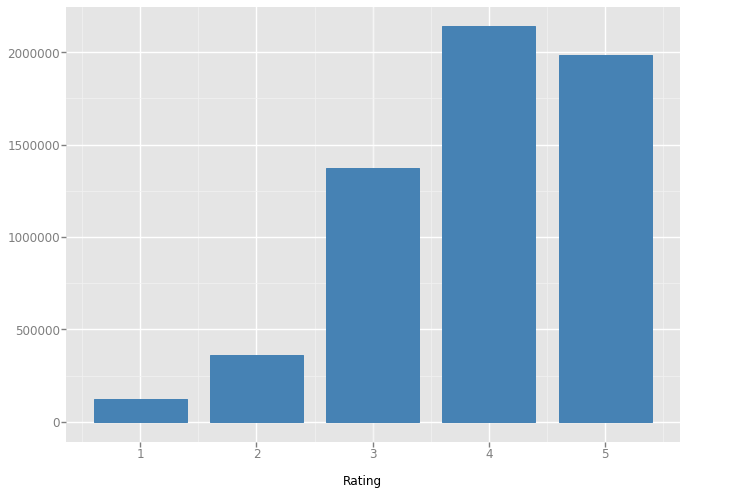

In [20]:
#Distribution of Ratings

rating_dist_hist = ggplot(aes(x='Rating'), data=ratings_df) + \
    geom_bar(fill = 'steelblue', color = 'snow') #+ scale_x_continuous(breaks=(0,5,1))

ggplot.save(rating_dist_hist, 'rating_dist')

In [21]:
tags_df['tag_words'] = tags_df.tag_name.apply(lambda x: x.split('-'))

In [22]:
tags_df.head()

,tag_id,tag_name,tag_words
0,0,-,"[, ]"
1,1,--1-,"[, , 1, ]"
2,2,--10-,"[, , 10, ]"
3,3,--12-,"[, , 12, ]"
4,4,--122-,"[, , 122, ]"


In [28]:
book_df[:1]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [53]:
booktags_df[booktags_df.goodreads_book_id ==2767052].head()

,goodreads_book_id,tag_id,count
619294,2767052,11557,50755
619295,2767052,8717,35418
619296,2767052,33114,25968
619297,2767052,11743,13819
619298,2767052,10064,12985


In [30]:
tags_and_desc = booktags_df.join(tags_df, on = ['tag_id'], how = 'left', lsuffix = '1')#.goodreads_book_id ==1]

In [31]:
#Hunger Games
tags_and_desc[tags_and_desc.goodreads_book_id ==2767052]

,goodreads_book_id,tag_id1,count,tag_id,tag_name,tag_words
619294,2767052,11557,50755,11557,favorites,[favorites]
619295,2767052,8717,35418,8717,currently-reading,"[currently, reading]"
619296,2767052,33114,25968,33114,young-adult,"[young, adult]"
619297,2767052,11743,13819,11743,fiction,[fiction]
619298,2767052,10064,12985,10064,dystopian,[dystopian]
619299,2767052,30574,11314,30574,to-read,"[to, read]"
619300,2767052,10059,11065,10059,dystopia,[dystopia]
619301,2767052,11305,10836,11305,fantasy,[fantasy]
619302,2767052,32989,10823,32989,ya,[ya]
619303,2767052,26837,8772,26837,science-fiction,"[science, fiction]"


In [32]:
#Harry Potter
tags_and_desc[tags_and_desc.goodreads_book_id ==1]

,goodreads_book_id,tag_id1,count,tag_id,tag_name,tag_words
0,1,30574,167697,30574,to-read,"[to, read]"
1,1,11305,37174,11305,fantasy,[fantasy]
2,1,11557,34173,11557,favorites,[favorites]
3,1,8717,12986,8717,currently-reading,"[currently, reading]"
4,1,33114,12716,33114,young-adult,"[young, adult]"
5,1,11743,9954,11743,fiction,[fiction]
6,1,14017,7169,14017,harry-potter,"[harry, potter]"
7,1,5207,6221,5207,books-i-own,"[books, i, own]"
8,1,22743,4974,22743,owned,[owned]
9,1,32989,4364,32989,ya,[ya]


In [35]:
genre_list = ["football"]
tags_df[tags_df.tag_name.isin(genre_list)]

,tag_id,tag_name,tag_words
12281,12281,football,[football]


In [36]:
genre_list=["art", "biography", "business", "chicklit", "childrens", "christian", "classics",
            "comics", "contemporary", "cookbooks", "crime", "ebooks", "fantasy", "fiction", 
            "history",  "horror", "humor", "comedy","manga", "memoir", "music", "mystery", "nonfiction", 
            "paranormal", "philosophy", "poetry", "psychology", "religion", "romance", "science", 
            "suspense", "spirituality", "sports", "thriller", "travel"]
#"shortstories","gay", "lesbian","historicalfiction","sciencefiction","graphicnovels","youngadult"

In [423]:
with open ('genre_list.pickle', 'wb') as to_write:
    pickle.dump(genre_list, to_write)

In [49]:
tags_df[tags_df.tag_name.isin(genre_list)]

,tag_id,tag_name,tag_words
2938,2938,art,[art]
4605,4605,biography,[biography]
5951,5951,business,[business]
6766,6766,chicklit,[chicklit]
6953,6953,childrens,[childrens]
7077,7077,christian,[christian]
7457,7457,classics,[classics]
7725,7725,comedy,[comedy]
7778,7778,comics,[comics]
8055,8055,contemporary,[contemporary]


In [38]:
genre_df = booktags_df.join(tags_df, on = 'tag_id', lsuffix = 'tag_id')[
    booktags_df.join(tags_df, on = 'tag_id', lsuffix = 'tag_id').tag_name.isin(genre_list)]

In [39]:
genre_df.head(10)

,goodreads_book_id,tag_idtag_id,count,tag_id,tag_name,tag_words
1,1,11305,37174,11305,fantasy,[fantasy]
5,1,11743,9954,11743,fiction,[fiction]
13,1,6953,2408,6953,childrens,[childrens]
25,1,7457,958,7457,classics,[classics]
38,1,22973,673,22973,paranormal,[paranormal]
52,1,20939,465,20939,mystery,[mystery]
73,1,26138,334,26138,romance,[romance]
83,1,8055,289,8055,contemporary,[contemporary]
102,2,11305,3441,11305,fantasy,[fantasy]
108,2,11743,972,11743,fiction,[fiction]


In [40]:
genre_df_for_plot = (genre_df.groupby(by = 'tag_name', as_index = False).sum()[['tag_name', 'count']]).sort_values('count', ascending = False)

In [41]:
genre_df_for_plot['percentage'] = genre_df_for_plot['count']/ genre_df_for_plot['count'].sum()

In [42]:
genre_df_for_plot.head()

,tag_name,count,percentage
14,fiction,3688819,0.226522
13,fantasy,3548157,0.217884
6,classics,1756920,0.107888
28,romance,1231926,0.075650
21,mystery,872282,0.053565


In [43]:
import seaborn as sns

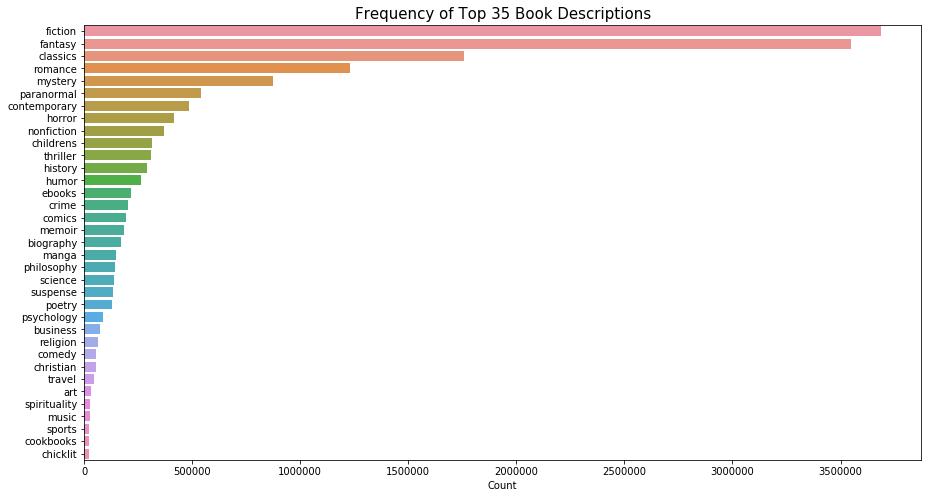

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

fig = sns.barplot(y = genre_df_for_plot['tag_name'], x = genre_df_for_plot['count']);
ax = sns.barplot(y = genre_df_for_plot['tag_name'], x = genre_df_for_plot['count']);
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title('Frequency of Top 35 Book Descriptions', fontdict = {'fontsize': 15})#Book Description Frequency (Top 35)

plt.savefig('genre_barchart')

In [54]:
booktags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [55]:
grouped_tags = (booktags_df.groupby(by = ['tag_id'], sort = False, as_index = False)[['count']].count())

In [56]:
grouped_tags.sort_values(by = 'count', ascending = False).tag_id[:30]

0      30574
2      11557
8      22743
7       5207
3       8717
58     18045
14     22753
5      11743
75     30521
71     17213
23      9221
81     10197
24     20774
28      3389
216    10210
154    32586
40     20849
37      3392
27     15169
197     1642
59      3371
11     11590
33     22034
56     22689
83      8055
67     25151
10     27199
237    10093
49     25152
76     25150
Name: tag_id, dtype: int64

In [57]:
#25 right number of tags to remove.  Thereafter, begin losing useful information

highest_tags = list(grouped_tags.sort_values(by = 'count', ascending = False).tag_id[:25])

In [58]:
#Tags to remove:

tags_df[tags_df.tag_id.isin(highest_tags)]

,tag_id,tag_name,tag_words
1642,1642,adult,[adult]
3371,3371,audio,[audio]
3389,3389,audiobook,[audiobook]
3392,3392,audiobooks,[audiobooks]
5207,5207,books-i-own,"[books, i, own]"
8055,8055,contemporary,[contemporary]
8717,8717,currently-reading,"[currently, reading]"
9221,9221,default,[default]
10197,10197,ebook,[ebook]
10210,10210,ebooks,[ebooks]


In [59]:
booktags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [60]:
removed_tags = [['', '']]

for tag in tags_df[tags_df.tag_id.isin(highest_tags)].tag_words:
    removed_tags.append(tag)

In [61]:
removed_tags

[['', ''],
 ['adult'],
 ['audio'],
 ['audiobook'],
 ['audiobooks'],
 ['books', 'i', 'own'],
 ['contemporary'],
 ['currently', 'reading'],
 ['default'],
 ['ebook'],
 ['ebooks'],
 ['favorites'],
 ['favourites'],
 ['fiction'],
 ['i', 'own'],
 ['kindle'],
 ['library'],
 ['my', 'books'],
 ['my', 'library'],
 ['novels'],
 ['own', 'it'],
 ['owned'],
 ['owned', 'books'],
 ['to', 'buy'],
 ['to', 'read'],
 ['wish', 'list']]

In [62]:
import pickle

In [252]:
with open ('removed_tags.pickle', 'wb') as to_write:
    pickle.dump(removed_tags, to_write)

In [63]:
tags_df.head()

,tag_id,tag_name,tag_words
0,0,-,"[, ]"
1,1,--1-,"[, , 1, ]"
2,2,--10-,"[, , 10, ]"
3,3,--12-,"[, , 12, ]"
4,4,--122-,"[, , 122, ]"


In [64]:
tags_df['new_tags'] = tags_df.tag_name.apply(lambda x: x.split('--'))

In [65]:
tags_df.head()

,tag_id,tag_name,tag_words,new_tags
0,0,-,"[, ]",[-]
1,1,--1-,"[, , 1, ]","[, 1-]"
2,2,--10-,"[, , 10, ]","[, 10-]"
3,3,--12-,"[, , 12, ]","[, 12-]"
4,4,--122-,"[, , 122, ]","[, 122-]"
